In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw_data/hackathon_sample_v2.csv', index_col=0, parse_dates=True)
df

,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,stock_exret,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,20000131,10078,11,3,0.017178,2000,1,B,0.0041,0.010428,...,2.219037,0.012635,0.504688,1.581540,1.373224,180,1.700939,1.711756,1.476410,1.087626
2000-01-31,20000131,10104,11,3,0.019720,2000,1,B,0.0041,-0.112577,...,1.437330,0.016634,0.473872,1.941648,2.058353,180,0.828930,1.717670,-0.603531,0.608215
2000-01-31,20000131,10107,11,3,0.011369,2000,1,B,0.0041,-0.165770,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
2000-01-31,20000131,10108,11,1,0.010600,2000,1,B,0.0041,0.216953,...,-0.285524,0.015658,0.327841,0.952188,1.187073,180,1.332815,1.453165,0.210170,1.130917
2000-01-31,20000131,10119,11,1,0.003485,2000,1,B,0.0041,-0.036462,...,0.217867,0.004411,0.289368,0.457370,0.715285,228,0.785417,-0.381167,1.689625,0.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,20231231,93330,11,1,0.004891,2023,12,B,0.0043,-0.022199,...,0.946309,0.003779,0.720817,1.241060,1.464466,887,0.683460,0.169549,0.627055,0.745462
2023-12-29,20231231,93356,11,3,0.004867,2023,12,B,0.0043,0.120845,...,1.481037,0.007985,0.642513,1.388323,1.578243,227,1.679546,1.550166,0.993086,1.619852
2023-12-29,20231231,93369,11,3,0.018935,2023,12,B,0.0043,-0.005245,...,1.239248,0.012130,0.454100,1.339266,1.407091,191,-0.039003,-0.435984,1.397522,-0.570584


In [3]:
df['ret_eom'].iloc[0]

20000131

In [4]:
def convert_int_to_datetime(df: pd.DataFrame, column_name: str = 'ret_eom') -> pd.DataFrame:
    """
    Convert a column in a pandas DataFrame containing integers in the format YYYYMMDD
    to datetime format (YYYY-MM-DD).
    
    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the column to convert.
    column_name : str, optional
        The name of the column to convert (default is 'ret_eom').
        
    Returns:
    -------
    pd.DataFrame
        A DataFrame with the specified column converted to datetime.
    
    Raises:
    ------
    KeyError:
        If the specified column is not found in the DataFrame.
    ValueError:
        If the column contains invalid data for conversion.
    """
    if column_name not in df.columns:
        raise KeyError(f"Column '{column_name}' not found in DataFrame.")
    
    # Ensure the column contains integers of the format YYYYMMDD
    try:
        df[column_name] = pd.to_datetime(df[column_name].astype(str), format='%Y%m%d')
    except ValueError as e:
        raise ValueError(f"Error converting column '{column_name}' to datetime: {e}")
    
    return df



In [5]:
df = convert_int_to_datetime(df)
df

,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,stock_exret,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2000-01-31,10078,11,3,0.017178,2000,1,B,0.0041,0.010428,...,2.219037,0.012635,0.504688,1.581540,1.373224,180,1.700939,1.711756,1.476410,1.087626
2000-01-31,2000-01-31,10104,11,3,0.019720,2000,1,B,0.0041,-0.112577,...,1.437330,0.016634,0.473872,1.941648,2.058353,180,0.828930,1.717670,-0.603531,0.608215
2000-01-31,2000-01-31,10107,11,3,0.011369,2000,1,B,0.0041,-0.165770,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
2000-01-31,2000-01-31,10108,11,1,0.010600,2000,1,B,0.0041,0.216953,...,-0.285524,0.015658,0.327841,0.952188,1.187073,180,1.332815,1.453165,0.210170,1.130917
2000-01-31,2000-01-31,10119,11,1,0.003485,2000,1,B,0.0041,-0.036462,...,0.217867,0.004411,0.289368,0.457370,0.715285,228,0.785417,-0.381167,1.689625,0.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,2023-12-31,93330,11,1,0.004891,2023,12,B,0.0043,-0.022199,...,0.946309,0.003779,0.720817,1.241060,1.464466,887,0.683460,0.169549,0.627055,0.745462
2023-12-29,2023-12-31,93356,11,3,0.004867,2023,12,B,0.0043,0.120845,...,1.481037,0.007985,0.642513,1.388323,1.578243,227,1.679546,1.550166,0.993086,1.619852
2023-12-29,2023-12-31,93369,11,3,0.018935,2023,12,B,0.0043,-0.005245,...,1.239248,0.012130,0.454100,1.339266,1.407091,191,-0.039003,-0.435984,1.397522,-0.570584


In [6]:
df.index.dtype

dtype('<M8[ns]')

In [7]:
df['ret_eom'].dtype

dtype('<M8[ns]')

In [8]:
df.index == df['ret_eom']

array([ True,  True,  True, ..., False, False, False])

In [9]:
df.index.unique()

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31',
               ...
               '2023-03-31', '2023-04-28', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-29', '2023-10-31',
               '2023-11-30', '2023-12-29'],
              dtype='datetime64[ns]', name='date', length=288, freq=None)

In [10]:
us_stocks = pd.read_excel('../data/raw_data/us_stocks_list.xlsx')[['Tickers', 'Name', 'Sector', 'Country']]
us_stocks

,Tickers,Name,Sector,Country
0,A US EQUITY,AGILENT TECHNOLOGIES INC,"Consumer, Non-cyclical",US
1,AA US EQUITY,ALCOA CORP,Basic Materials,US
2,AAL US EQUITY,AMERICAN AIRLINES GROUP INC,"Consumer, Cyclical",US
3,AAN US EQUITY,AARON'S CO INC/THE,"Consumer, Non-cyclical",US
4,AAON US EQUITY,AAON INC,Industrial,US
...,...,...,...,...
3560,FCE/A US EQUITY,Diversified REITs,Financial,US
3561,HUB/B US EQUITY,Electrical Components & Equipm,Industrial,US
3562,JW/A US EQUITY,Publishing,"Consumer, Non-cyclical",US
3563,NMG/A US EQUITY,NaN,"Consumer, Cyclical",US


In [11]:
def extract_first_ticker_name(df: pd.DataFrame, column_name: str = 'Tickers') -> pd.DataFrame:
    """
    Extract the first word from a specified column in a pandas DataFrame
    and create a new column named 'Tickers_name' with the extracted value.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the column to split.
    column_name : str
        The name of the column from which to extract the first word.
        
    Returns:
    -------
    pd.DataFrame
        The original DataFrame with an added 'Tickers_name' column containing the first word.
    
    Raises:
    ------
    KeyError:
        If the specified column is not found in the DataFrame.
    """
    if column_name not in df.columns:
        raise KeyError(f"Column '{column_name}' not found in DataFrame.")
    
    # Extract the first word (before the first space) and create a new column 'Tickers_name'
    df['Ticker_name'] = df[column_name].str.split().str[0]
    
    return df

In [12]:
us_stocks = extract_first_ticker_name(us_stocks, 'Tickers')

In [13]:
# keep only rows where 'Country' == 'US'
print(f"US stocks before filtering: {us_stocks.shape[0]}")
us_stocks = us_stocks[us_stocks['Country'] == 'US']
print(f"US stocks after filtering: {us_stocks.shape[0]}")

US stocks before filtering: 3565
US stocks after filtering: 3404


In [14]:
def filter_by_ticker(df1: pd.DataFrame, df2: pd.DataFrame, ticker_col1: str = 'Ticker_name', ticker_col2: str = 'stock_ticker') -> pd.DataFrame:
    """
    Merge two DataFrames by keeping only the rows in the second DataFrame 
    where the tickers match the values in the 'Tickers_name' column of the first DataFrame.
    This function also calculates the number of unique tickers that were dropped.

    Parameters:
    ----------
    df1 : pd.DataFrame
        The first DataFrame containing the 'Tickers_name' column.
    df2 : pd.DataFrame
        The second DataFrame containing the 'stock_ticker' column to be filtered.
    ticker_col1 : str, optional
        The name of the column in df1 with tickers (default is 'Tickers_name').
    ticker_col2 : str, optional
        The name of the column in df2 with tickers (default is 'stock_ticker').

    Returns:
    -------
    pd.DataFrame
        The filtered DataFrame with rows from df2 that match the tickers from df1.
    
    Displays:
    --------
    - The number of rows before and after filtering in df2.
    - The number of unique tickers before and after filtering.
    - The number of unique tickers that were dropped.
    """
    # Check if the specified columns exist in the DataFrames
    if ticker_col1 not in df1.columns:
        raise KeyError(f"Column '{ticker_col1}' not found in the first DataFrame.")
    if ticker_col2 not in df2.columns:
        raise KeyError(f"Column '{ticker_col2}' not found in the second DataFrame.")
    
    # Get unique tickers from both DataFrames before filtering
    unique_tickers_before = df2[ticker_col2].nunique()
    
    # Get the unique tickers from df1
    valid_tickers = df1[ticker_col1].unique()
    
    # Filter df2 to keep only rows where the stock_ticker is in valid_tickers
    filtered_df = df2[df2[ticker_col2].isin(valid_tickers)]
    
    # Get unique tickers after filtering
    unique_tickers_after = filtered_df[ticker_col2].nunique()
    
    # Calculate the number of unique tickers that were dropped
    unique_tickers_dropped = unique_tickers_before - unique_tickers_after
    
    # Display the results
    print(f"Initial number of rows in df2: {df2.shape[0]}")
    print(f"Number of rows after filtering: {filtered_df.shape[0]}")
    print(f"Initial number of unique tickers in df2: {unique_tickers_before}")
    print(f"Number of unique tickers after filtering: {unique_tickers_after}")
    print(f"Number of unique tickers dropped: {unique_tickers_dropped}")
    
    return filtered_df

In [15]:
filtered_df = filter_by_ticker(us_stocks, df)
filtered_df

Initial number of rows in df2: 273373
Number of rows after filtering: 259640
Initial number of unique tickers in df2: 3565
Number of unique tickers after filtering: 3271
Number of unique tickers dropped: 294


,ret_eom,permno,shrcd,exchcd,mspread,year,month,size_port,rf,stock_exret,...,betadown_252d,bidaskhl_21d,corr_1260d,betabab_1260d,rmax5_rvol_21d,age,qmj,qmj_prof,qmj_growth,qmj_safety
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,2000-01-31,10078,11,3,0.017178,2000,1,B,0.0041,0.010428,...,2.219037,0.012635,0.504688,1.581540,1.373224,180,1.700939,1.711756,1.476410,1.087626
2000-01-31,2000-01-31,10104,11,3,0.019720,2000,1,B,0.0041,-0.112577,...,1.437330,0.016634,0.473872,1.941648,2.058353,180,0.828930,1.717670,-0.603531,0.608215
2000-01-31,2000-01-31,10107,11,3,0.011369,2000,1,B,0.0041,-0.165770,...,1.466883,0.003855,0.563178,1.228124,1.899772,180,1.190962,1.682187,-0.583515,1.336684
2000-01-31,2000-01-31,10108,11,1,0.010600,2000,1,B,0.0041,0.216953,...,-0.285524,0.015658,0.327841,0.952188,1.187073,180,1.332815,1.453165,0.210170,1.130917
2000-01-31,2000-01-31,10119,11,1,0.003485,2000,1,B,0.0041,-0.036462,...,0.217867,0.004411,0.289368,0.457370,0.715285,228,0.785417,-0.381167,1.689625,0.331900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,2023-12-31,93330,11,1,0.004891,2023,12,B,0.0043,-0.022199,...,0.946309,0.003779,0.720817,1.241060,1.464466,887,0.683460,0.169549,0.627055,0.745462
2023-12-29,2023-12-31,93356,11,3,0.004867,2023,12,B,0.0043,0.120845,...,1.481037,0.007985,0.642513,1.388323,1.578243,227,1.679546,1.550166,0.993086,1.619852
2023-12-29,2023-12-31,93369,11,3,0.018935,2023,12,B,0.0043,-0.005245,...,1.239248,0.012130,0.454100,1.339266,1.407091,191,-0.039003,-0.435984,1.397522,-0.570584


<Axes: xlabel='date'>

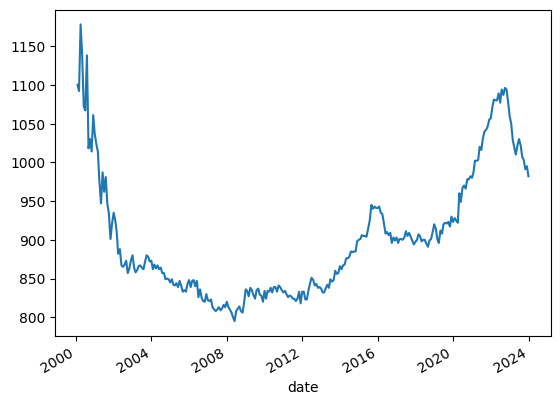

In [16]:
# Compte le nombre de ticker unique par date et plot le nombre de ticker unique par date

filtered_df.groupby('date')['stock_ticker'].nunique().plot()

<Axes: xlabel='date'>

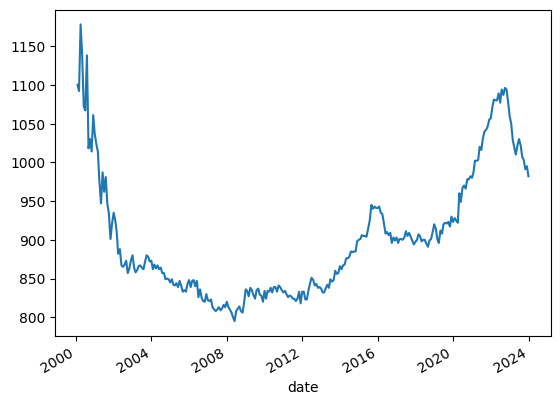

In [17]:
filtered_df.groupby('date')['permno'].nunique().plot()


In [18]:
pd.DataFrame(filtered_df['permno'].unique()).to_csv('../data/raw_data/permno.csv', sep=',')


In [19]:
pd.DataFrame(filtered_df['stock_ticker'].unique()).to_csv('../data/raw_data/stock_ticker_name.csv', sep=',')
